# SCIKIT LEARN - SIMPLE LINEAR REGRESSION

$$y = b_{0} + b_{1}x + \epsilon$$  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Sample data x = "square meters" and y  = "price"
x = np.array([45, 50, 60, 60, 70, 80, 90, 90, 100, 110])  # Independent variable (features)
y = np.array([150, 160, 200, 180, 230, 250, 300, 280, 300, 400])  # Dependent variable (target)
# Reshape x for sklearn
x_reshaped = x.reshape(-1, 1)

In [2]:
# Number of observations
n = len(x) 
print(f"Number of observations: {n}")

Number of observations: 10


In [3]:
# Crear el modelo de regresión lineal
model = LinearRegression()
# Entrenar el modelo
model.fit(x_reshaped, y)

LinearRegression()

In [4]:
# Get the coefficients and intercept
intercept = model.intercept_ 
coefficients = model.coef_ 
print(f"Coefficient β0 (Intercept): {intercept}")
print(f"Coefficients β1 (slope): {coefficients}")

Coefficient β0 (Intercept): -14.817813765182223
Coefficients β1 (slope): [3.44129555]


In [5]:
# Hacer predicciones usando sklearn models
y_pred = model.predict(x_reshaped)
print(f"y_pred:\n{y_pred}")

# Hacer predicciones manualmente
y_pred = intercept + (coefficients[0] * x)
print(f"y_pred (Manual):\n{y_pred}")

y_pred:
[140.04048583 157.24696356 191.65991903 191.65991903 226.07287449
 260.48582996 294.89878543 294.89878543 329.31174089 363.72469636]
y_pred (Manual):
[140.04048583 157.24696356 191.65991903 191.65991903 226.07287449
 260.48582996 294.89878543 294.89878543 329.31174089 363.72469636]


In [6]:
# Evaluar el modelo

# Error medio cuadrado, mean square error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Error medio cuadrado manual
mse = np.mean((y - y_pred) ** 2)
print(f"Mean Squared Error (Manual): {mse:.2f}")

# Coeficiente Determinación (R2)
# 1 is perfect prediction > se trata de una estimación imparcial del rendimiento predictivo de su modelo
r2 = r2_score(y, y_pred)
print(f"Coefficient of determination: {r2:.2f}")
print(f"Coefficient of determination: {model.score(x_reshaped, y):.2f}")

# Coeficiente determinación manual
y_mean = np.mean(y)
SS_res = np.sum((y - y_pred) ** 2)  # Residual sum of squares
SS_tot = np.sum((y - y_mean) ** 2)  # Total sum of squares
r2 = 1 - (SS_res / SS_tot)
print(f"Coefficient of determination (Manual): {r2:.2f}")

Mean Squared Error: 286.07
Mean Squared Error (Manual): 286.07
Coefficient of determination: 0.95
Coefficient of determination: 0.95
Coefficient of determination (Manual): 0.95


In [7]:
# Resumen
df_result = pd.DataFrame({
    'x': x,
    'y': y,
    'y_pred': y_pred,
    '(y - y_pred)': y - y_pred,
    '(y - y_pred)**2': (y - y_pred)**2
})
print(df_result)

     x    y      y_pred  (y - y_pred)  (y - y_pred)**2
0   45  150  140.040486      9.959514        99.191923
1   50  160  157.246964      2.753036         7.579210
2   60  200  191.659919      8.340081        69.556951
3   60  180  191.659919    -11.659919       135.953712
4   70  230  226.072874      3.927126        15.422315
5   80  250  260.485830    -10.485830       109.952630
6   90  300  294.898785      5.101215        26.022390
7   90  280  294.898785    -14.898785       221.973807
8  100  300  329.311741    -29.311741       859.178154
9  110  400  363.724696     36.275304      1315.897654


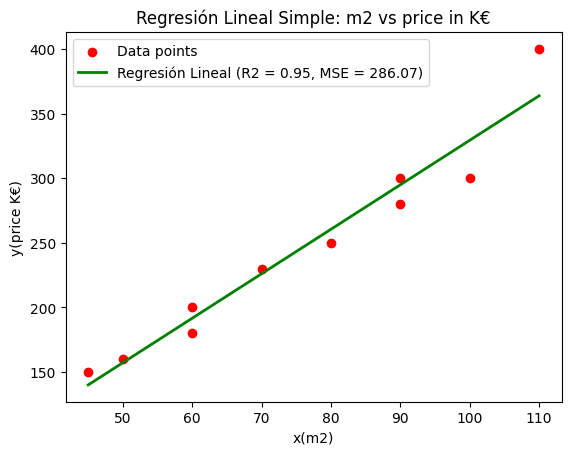

In [8]:
# Gráfico de predicciones vs reales
plt.scatter(x, y, color='red', label='Data points')
plt.plot(x, y_pred, color='green', linewidth=2, label=f'Regresión Lineal (R2 = {r2:.2f}, MSE = {mse:.2f})')
plt.title('Regresión Lineal Simple: m2 vs price in K€')
plt.xlabel('x(m2)')
plt.ylabel('y(price K€)')
plt.legend()
plt.show()

## train_test_split

Si tienes un número adecuado de datos (ni muy pocos ni excesivos), dividir tu dataset en entrenamiento y prueba es importante para garantizar que el modelo no esté “aprendiendo de memoria” y este sobreajustado (overfitting). Dividir los datos permite evaluar el rendimiento en un conjunto que el modelo no ha visto, lo que refleja mejor cómo funcionará en datos del mundo real con datos no vistos.

### Overfitting

El **overfitting o sobreajuste** es un fenómeno que ocurre cuando un modelo de aprendizaje automático se ajusta demasiado bien a los datos de entrenamiento, hasta el punto de captar el ruido o las particularidades específicas de esos datos. Como resultado, el modelo puede tener un desempeño excelente en el conjunto de entrenamiento pero un desempeño deficiente en los datos de prueba o en datos nuevos. 

#### Consecuencias
- El modelo tendrá un bajo error en el entrenamiento, pero un alto error en el conjunto de prueba o en datos no vistos.
- Dificultad para generalizar a nuevos datos, lo que lo convierte en un modelo poco útil para predicciones en el mundo real.
- Para evitarlo, se pueden usar técnicas como la regularización, validación cruzada, early stopping, pruning, entre otras.

### Parámetros
- **test_size**: De forma predeterminada, el 25 por ciento de las muestras se asigna al conjunto de prueba. Si es float, debe estar comprendido entre 0,0 y 1,0 y representa la proporción del conjunto de datos que se incluirá en la división de la prueba. Si es int, representa el número absoluto de muestras de prueba.
- **random_state**: El uso de un int producirá los mismos resultados en diferentes llamadas. Las semillas aleatorias enteras populares son 0 y 42.

x_train:
[[ 45]
 [ 90]
 [ 60]
 [110]
 [ 70]
 [ 60]
 [ 90]]
x_test:
[[100]
 [ 50]
 [ 80]]
y_pred:
[329.31174089 157.24696356 260.48582996]
Mean Squared Error: 325.57
Coefficient of determination: 0.90
Coefficient of determination train set: 0.97
Coefficient of determination test set: 0.80


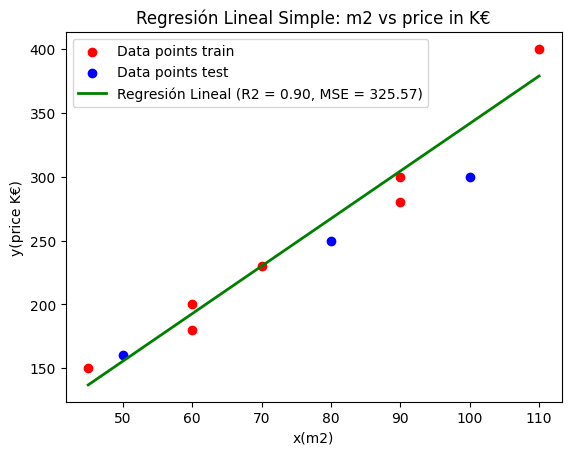

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_reshaped, y, test_size=0.3, random_state=42)
print(f"x_train:\n{x_train}")
print(f"x_test:\n{x_test}")

# Crear el modelo de regresión lineal
model_split = LinearRegression()

# Entrenar el modelo
model_split.fit(x_train, y_train)

# Hacer predicciones usando sklearn models
y_pred_split = model.predict(x_test)
print(f"y_pred:\n{y_pred_split}")

# Evaluar el modelo

# Error medio cuadrado, mean square error (MSE)
mse_split = mean_squared_error(y_test, y_pred_split)
print(f"Mean Squared Error: {mse_split:.2f}")

# Coeficiente Determinación (R2)
r2_split = r2_score(y_test, y_pred_split)
print(f"Coefficient of determination: {r2_split:.2f}")
print(f"Coefficient of determination train set: {model_split.score(x_train, y_train):.2f}")
print(f"Coefficient of determination test set: {model_split.score(x_test, y_test):.2f}")

# Gráfico de predicciones vs reales
plt.scatter(x_train, y_train, color='red', label='Data points train')
plt.scatter(x_test, y_test, color='blue', label='Data points test')
plt.plot(x_reshaped, model_split.predict(x_reshaped), color='green', linewidth=2, label=f'Regresión Lineal (R2 = {r2_split:.2f}, MSE = {mse_split:.2f})')
plt.title('Regresión Lineal Simple: m2 vs price in K€')
plt.xlabel('x(m2)')
plt.ylabel('y(price K€)')
plt.legend()
plt.show()